In [6]:
%load_ext autoreload
%autoreload 2
import os
import shutil
if not os.path.exists('configs'): get_ipython().run_line_magic('cd', '..')

from utils import plot_utils as putils
custom_color_dict = putils.set_matplotlib_params()

from preprocessing.preprocessing_utils import Backup, get_data_paths, get_figure_path
asset_path, data_path = get_data_paths('./configs')
figure_path = get_figure_path('./configs')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Standard library imports
from pathlib import Path
from datetime import datetime
import json
import pickle
from collections import defaultdict

# Data handling and preprocessing
import pandas as pd
import numpy as np

# Geospatial data handling
import cartopy.crs as ccrs

# Visualization
import matplotlib.pyplot as plt

# Parallel processing
from multiprocessing import Pool

import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib import cm


In [23]:
cat_c = ['darkorange', 'crimson', 'indigo', 'dodgerblue']

# 여러 해의 데이터를 읽고 concat하여 고유한 'num' 값만 남기기
pos = pd.concat(
    pd.read_csv(Path(figure_path, 'region', f'region_data_{year}.csv'))
    for year in [2020, 2021, 2022]
).drop_duplicates(subset=['num'])

# 'year' 컬럼 삭제하고 'cat' 컬럼 생성
pos = pos.drop(columns=['year'])
pos = pos.rename(columns={'priority': 'cat'})
pos = pos.sort_values(by='num').reset_index(drop=True)
pos.head()

,num,lon,lat,cat
0,4821,126.544771,33.273132,3
1,5565,126.491969,33.501242,3
2,5566,126.546631,33.500946,3
3,5567,126.601292,33.500620,3
4,8994,126.610883,34.550807,3


____

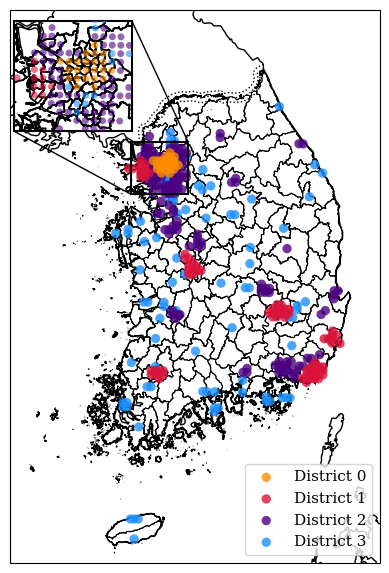

In [25]:
# Setup the figure and axis with Cartopy projection
fig, ax = plt.subplots(1, 1, figsize=(4, 6.1), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot South Korea
putils.plot_korea(figure_path, ax, 124.8, 130.0, 33.0, 39.3)

# make scatter plot
for cat in range(4):
    pos_cat = pos[pos['cat'] == cat]
    ax.scatter(pos_cat['lon'], pos_cat['lat'], label=f'District {cat}', s=45, alpha=0.8, \
               zorder=99-cat, facecolor=cat_c[cat], edgecolor='none')

x1, x2, y1, y2 = 126.5, 127.3, 37.2, 37.8
axins = ax.inset_axes([0.01, 0.77, 0.32, 0.22], projection=ccrs.PlateCarree(), xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
putils.plot_korea(figure_path, axins, x1, x2, y1, y2, zorder_base=50, boundary_lw=1.2)
putils.zoom_line(ax, axins)

for cat in range(4):
    pos_cat = pos[pos['cat'] == cat]
    axins.scatter(pos_cat['lon'], pos_cat['lat'], label=f'District {cat}', s=25, alpha=0.6, \
                  zorder=99-cat, facecolor=cat_c[cat], edgecolor='none')

# Add legend
ax.legend(fontsize=11, loc='lower right')
fig.tight_layout()  # Adjust the layout to make room for the legen
fig.savefig(Path(figure_path, 'map_district.png'), dpi=600)

_____